In [18]:
import glob
import os

import matplotlib.pyplot as plt 
import xarray as xr 
import numpy as np
import seaborn as sns

# Generated files ? of 13041 ..

In [22]:
len(glob.glob('/home/hanna/lagrings/ar_data/*'))

611

# Preliminary results AR-models

## Combinations:
1. Bias, B
2. Scaling predictors, T
3. Sigmoid transforming target, S
4. The lag, L previosly reffered to  order of the AR model. This will be updated in overleaf soon. 

Other abbreviations AR - autoregressive model includes enviornmental variables as predictors. TR for traditional model does not.
Models are given names based on the following convention.

$AR_{STB_L}$ or $TR_{STB_L}$, since bias, tranform, sigmoid are bools the letters are included if they are true, and excluded if false. The full STB implies that they are all true and applied in the preprosessing. 


# Attempted runs
** Files containing weights and performace is stored in seperated files.

In [2]:
path = '/home/hanna/lagrings/results/ar/'
example = glob.glob(path+'/performance*-5-*')

In [7]:
len(example) # num models -- one for each coordinate pair of (lat, lon).

12155

In [8]:
unique_models = np.unique([f.split('_')[1] for f in example]) # unique combinations
unique_models

array(['AR-5-o0', 'AR-5-o1', 'AR-5-o2', 'AR-5-o3', 'AR-5-o4', 'AR-5-o5',
       'AR-S-5-o0', 'AR-S-5-o1', 'AR-S-5-o2', 'AR-S-5-o3', 'AR-S-5-o4',
       'AR-S-5-o5', 'AR-T-5-o0', 'AR-T-5-o1', 'AR-T-5-o2', 'AR-T-5-o3',
       'AR-T-5-o4', 'AR-T-5-o5', 'TR-5-o1', 'TR-5-o2', 'TR-5-o3',
       'TR-5-o4', 'TR-5-o5', 'TR-S-5-o1', 'TR-S-5-o2', 'TR-S-5-o3',
       'TR-S-5-o4', 'TR-S-5-o5', 'TR-T-5-o1', 'TR-T-5-o2', 'TR-T-5-o3',
       'TR-T-5-o4', 'TR-T-5-o5'], dtype='<U9')

# Performance of unique models.
## BUG in MAE stores MSE ...

# Mean of train and test score to get a overview

In [10]:
test_scores  = []
model_names  = []
train_scores = []

In [11]:
for model in unique_models:
    relevant_files = glob.glob(path+f'/performance*{model}*')
    data = xr.open_mfdataset(relevant_files, combine = 'by_coords') 
    test  = data['mse_test'].mean().values
    train = data['mse_train'].mean().values
    
    test_scores.append(test)
    train_scores.append(train)
    model_names.append(model)
    
    print(f'Model: {model}, train score: {train:.4f} and test score {test:.4f}. ')

Model: AR-5-o0, train score: 0.1384 and test score 0.1380. 
Model: AR-5-o1, train score: 0.0453 and test score 0.0441. 
Model: AR-5-o2, train score: 0.0447 and test score 0.0437. 
Model: AR-5-o3, train score: 0.0445 and test score 0.0434. 
Model: AR-5-o4, train score: 0.0444 and test score 0.0433. 
Model: AR-5-o5, train score: 0.0443 and test score 0.0433. 
Model: AR-S-5-o0, train score: 0.1141 and test score 0.1139. 
Model: AR-S-5-o1, train score: 0.0372 and test score 0.0363. 
Model: AR-S-5-o2, train score: 0.0368 and test score 0.0359. 
Model: AR-S-5-o3, train score: 0.0366 and test score 0.0357. 
Model: AR-S-5-o4, train score: 0.0365 and test score 0.0356. 
Model: AR-S-5-o5, train score: 0.0364 and test score 0.0356. 
Model: AR-T-5-o0, train score: 0.2126 and test score 0.2209. 
Model: AR-T-5-o1, train score: 0.2075 and test score 0.2144. 
Model: AR-T-5-o2, train score: 0.2043 and test score 0.2112. 
Model: AR-T-5-o3, train score: 0.2015 and test score 0.2082. 
Model: AR-T-5-o4, tr

In [63]:
NAMES = np.array(model_names[:3*6]).reshape(int(len(model_names[:3*6])/6), 6)
ar_names = [ l.split('-5-')[0] for l in NAMES[:, 0] ]

NAMES = np.array(model_names[3*6:]).reshape(int(len(model_names[3*6:])/5), 5)
tr_names = [ l.split('-5-')[0] for l in NAMES[:, 0] ]

In [64]:
ar_names+tr_names

['AR', 'AR-S', 'AR-T', 'TR', 'TR-S', 'TR-T']

In [59]:
ar_data      = np.array(test_scores[:3*6]).reshape(int(len(test_scores[:3*6])/6), 6)
temp_tr_data = np.array(test_scores[3*6:]).reshape(int(len(test_scores[3*6:])/5), 5)
tr_data = np.concatenate([np.nan*np.ones((data.shape[0], 1)), data], axis = 1)

In [61]:
merged = np.concatenate([ar_data, tr_data], axis = 0)

Text(0.5, 1.0, 'MSE --  means are based on a subset of coordinates to get an overview')

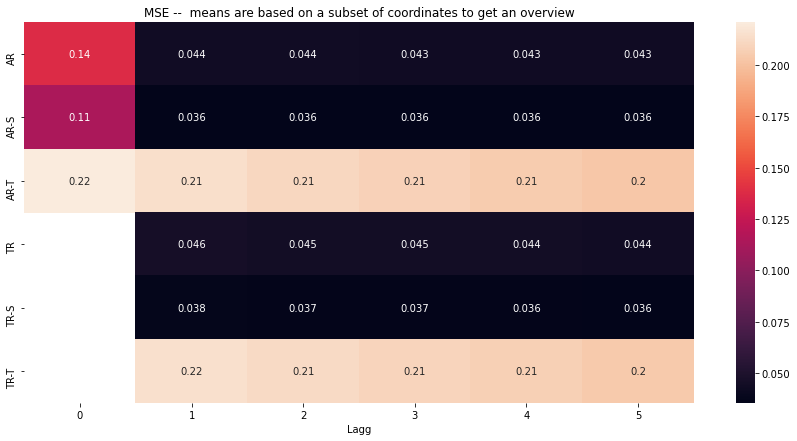

In [67]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax = sns.heatmap(merged, 
                 annot = True, # xticklabels='auto', 
                 yticklabels=ar_names+tr_names, ax = ax)
ax.set_xlabel('Lagg')
ax.set_title('MSE --  means are based on a subset of coordinates to get an overview')

# Comments TODOs
1. Look more into weights - which predictors are important. 
2. Looks like adding more than one lag does add any significat information. 
3. In isolation sigmoid transformation perform best, followed by none and last is scaling the data. 
4. There is a small difference between ar and tr models, where ar does it best. 


Tenker og kjøre følgende andre kombinasjoner 
* B in isolation 
* BS, BT
* BST

# Gridded data -- Didn't to to much work on this is difficult to acess performance on a gridded level. For further I find it best to focus on a calibrated level. 

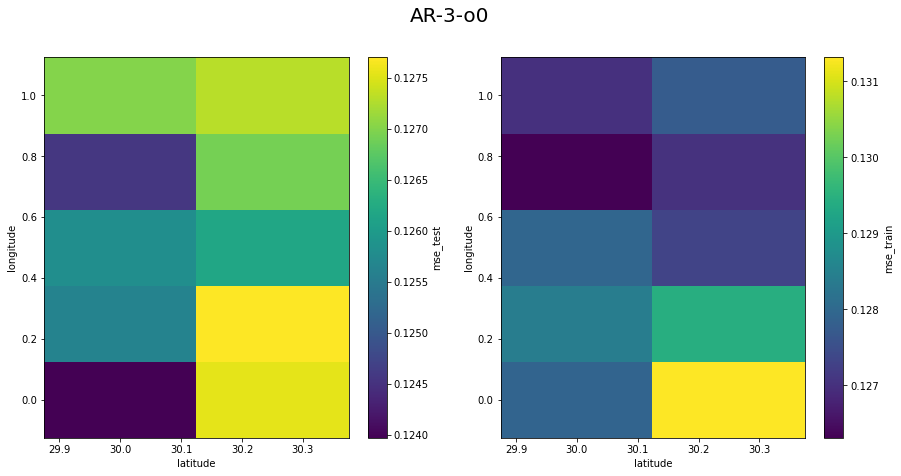

In [33]:
key = 'AR-3-o0'
relevant_files = glob.glob(path+f'/performance*{key}*')
data = xr.open_mfdataset(relevant_files, combine = 'by_coords') 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))
data['mse_test'].plot(ax = axes[0])
data['mse_train'].plot(ax = axes[1])
fig.suptitle(key, fontsize = 20);

In [48]:
def plot_mse(key = 'AR-3-o0'):
    """ Quick plot function .. """
    relevant_files = glob.glob(path+f'/performance*{key}*')
    data = xr.open_mfdataset(relevant_files, combine = 'by_coords') 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))
    data['mse_test'].plot(ax = axes[0])
    data['mse_train'].plot(ax = axes[1])
    fig.suptitle(key, fontsize = 20);
    plt.show()
    return 

In [ ]:
for model in unique_models:
    plot_mse(key = model)